In [1]:
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import json
import numpy as np

In [2]:
with open('../snaps/reddit.json', 'r') as f:
    data = json.load(f)
    nxg = json_graph.node_link_graph(data, directed=True)

In [7]:
def plot_subjectivity(g, metric="degree"):
    subj = np.zeros(len(g.nodes))
    
    met = np.zeros(len(g.nodes))
    bgr_met = np.zeros(len(g.nodes))
    jac_met = np.zeros(len(g.nodes))
    w_met = np.zeros(len(g.nodes))
    
    for i, (n, data) in enumerate(g.nodes(data=True)):
        subj[i] = data["subjectivity"]
        met[i] = data[metric]
#         try:
#             met[i] = data[metric]
#         except KeyError:
#             pass
#         try:
#             bgr_met[i] = data["bgr_{0}".format(metric)]
#         except KeyError:
#             pass
#         try:
#             jac_met[i] = data["jac_{0}".format(metric)]
#         except KeyError:
#             pass
#         try:
#             w_met[i] = data["w_{0}".format(metric)]
#         except KeyError:
#             pass
    
    ind = np.argsort(subj)
#     leg = list()
    fig, ax = plt.subplots(figsize=(12,7))
    ax.plot(subj[ind], met[ind])
#     if sum(met[ind]) > 0:
#         p1 = ax.plot(subj[ind], met[ind])
#         leg.append("Raw")
#     if sum(bgr_met[ind]) > 0:
#         p2 = ax.plot(subj[ind], bgr_met[ind])
#         leg.append("BGR")
#     if sum(jac_met[ind]) > 0:
#         p3 = ax.plot(subj[ind], jac_met[ind])
#         leg.append("Jaccard")
#     if sum(w_met[ind]) > 0:
#         p4 = ax.plot(subj[ind], w_met[ind])
#         leg.append("Weight")
    
#     ax.legend(leg)
    print(metric)
    ax.set_title(metric)
    ax.set_xlabel("Subjectivity")
    ax.set_ylabel(metric.split("_")[-1])
    plt.show()

$$\textbf{NDI }\eta(G, x) := \sum_{i,j \in E}{w_{ij}(x_i - x_j)^2}$$

degree


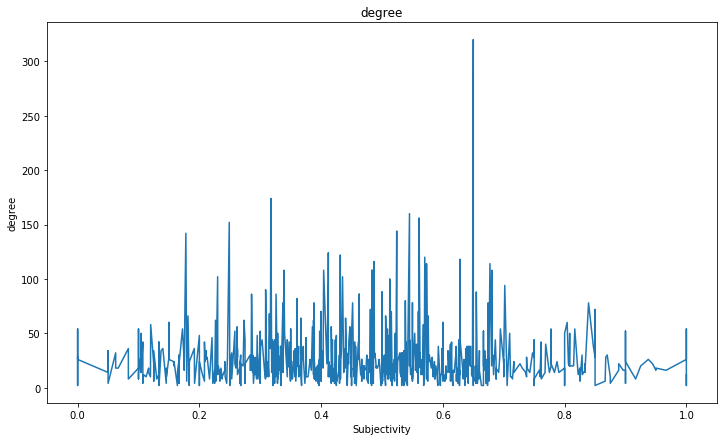

w_degree


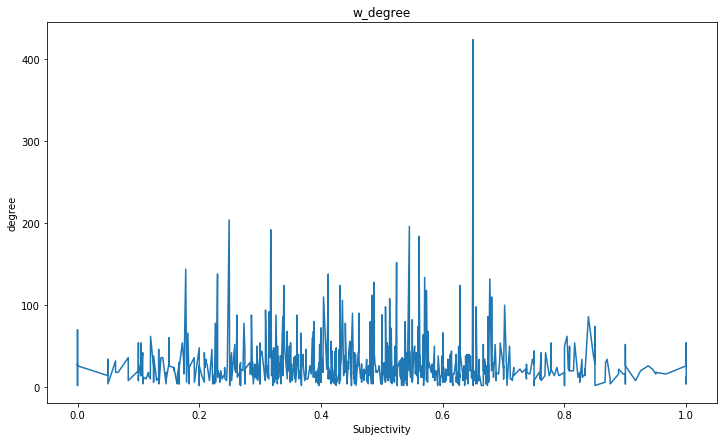

jac_degree


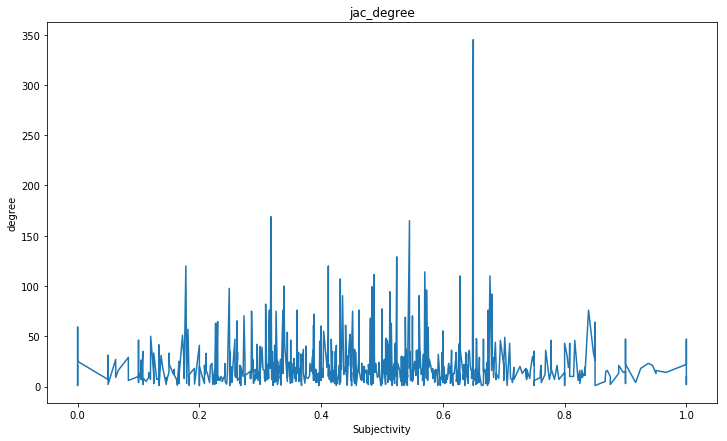

bgr_degree


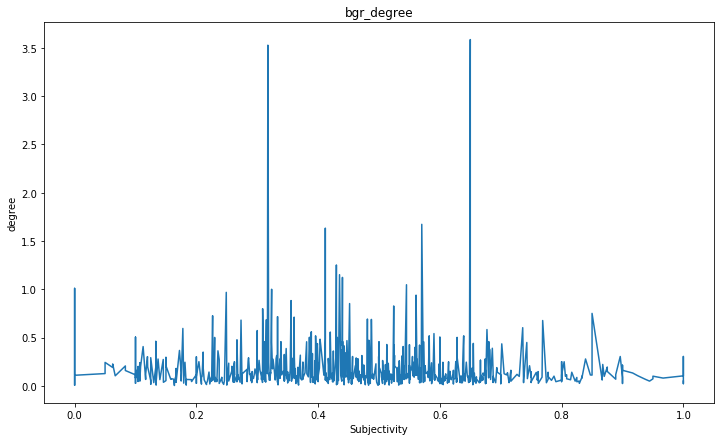

betweenness


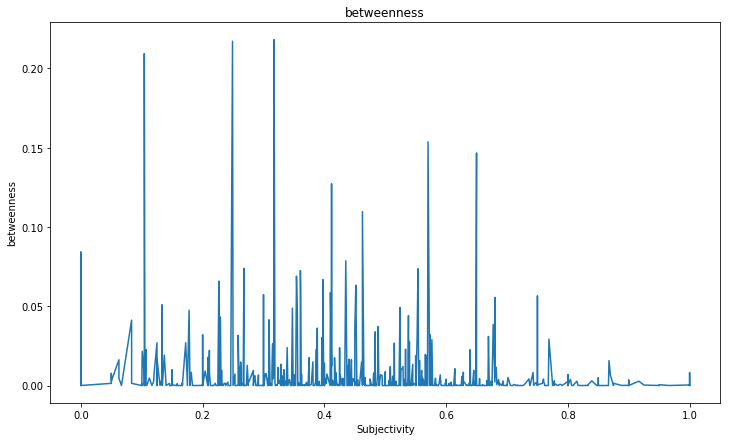

w_betweenness


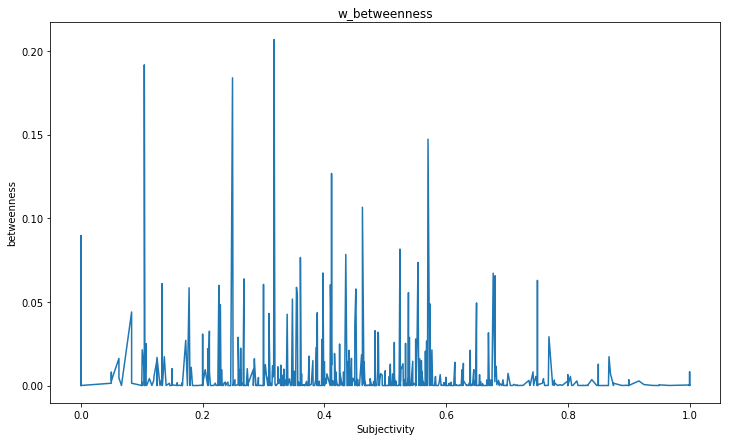

jac_betweenness


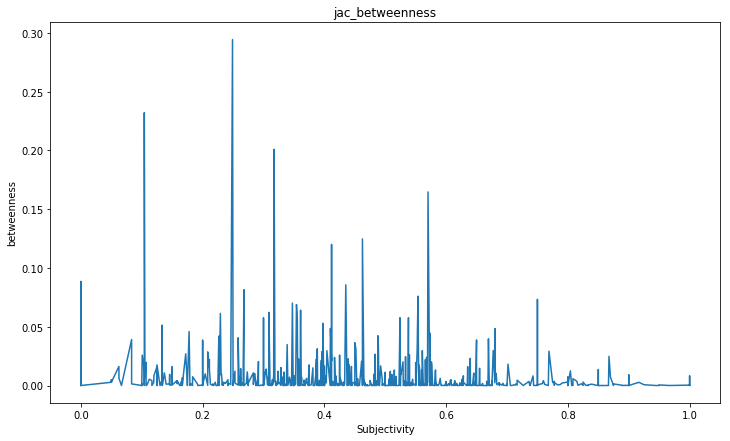

bgr_betweenness


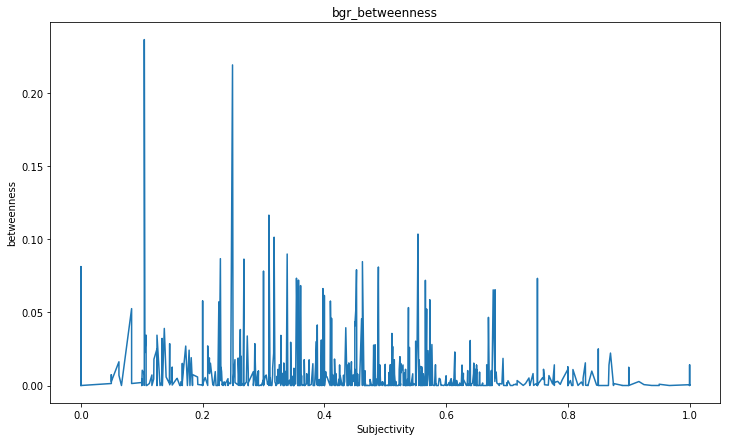

closeness


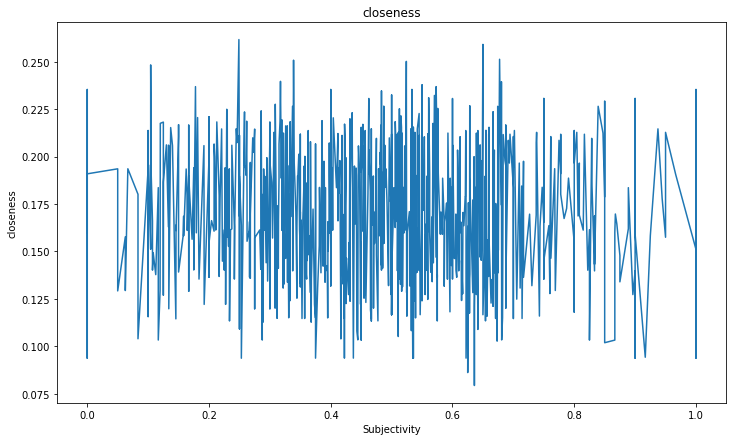

eigenvector


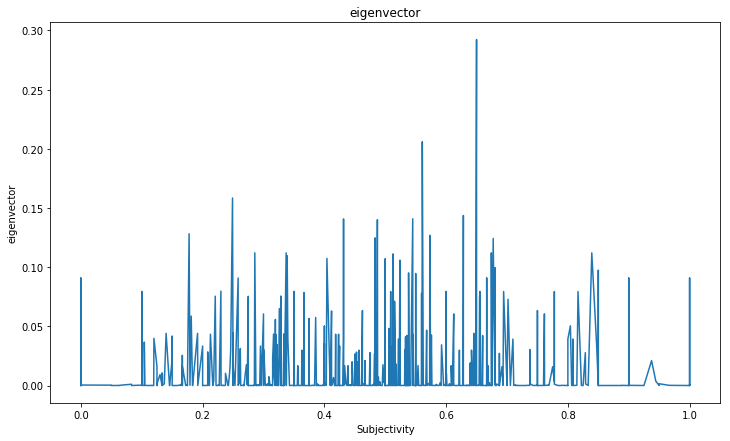

w_eigenvector


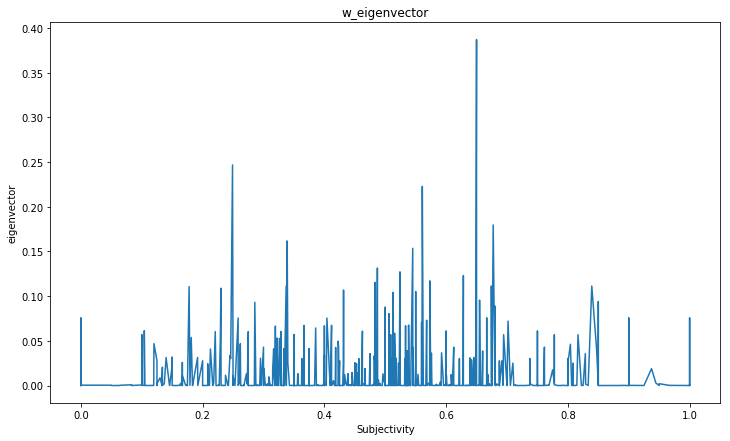

jac_eigenvector


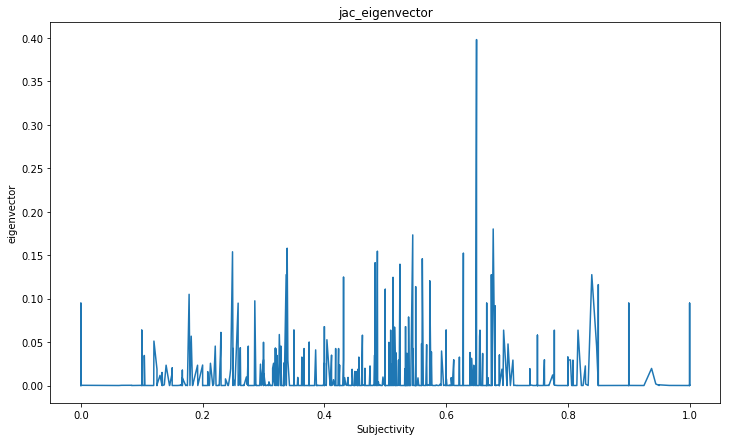

clustering coeff


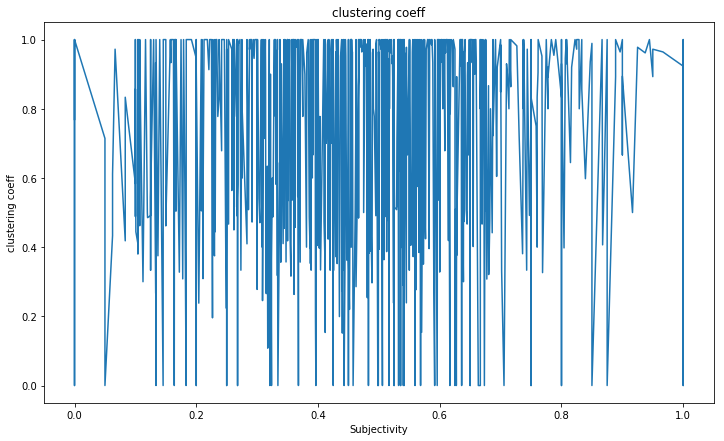

w_clustering coeff


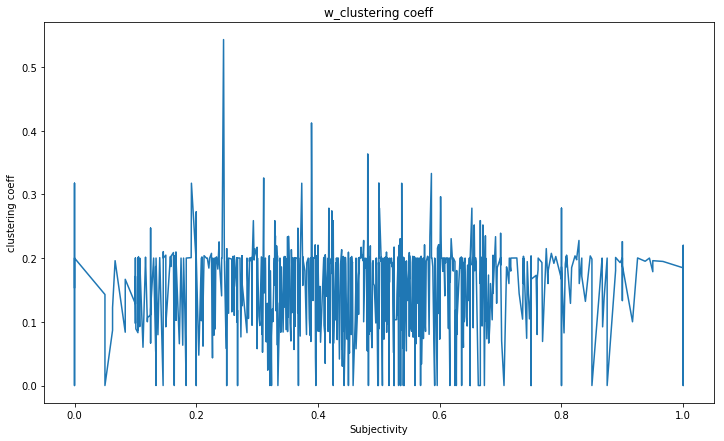

jac_clustering coeff


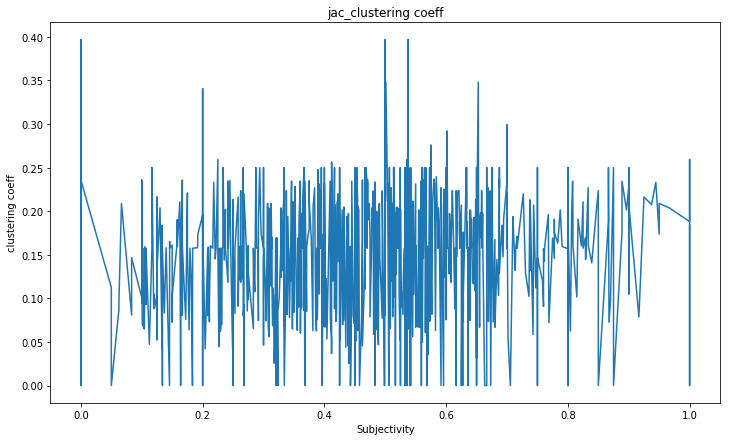

bgr_clustering coeff


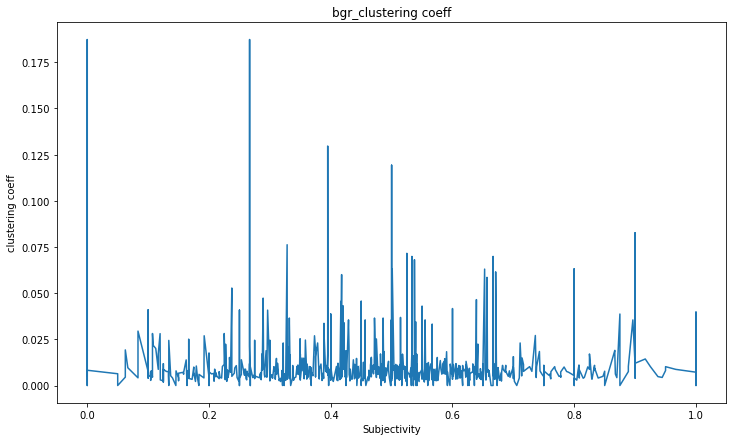

pagerank


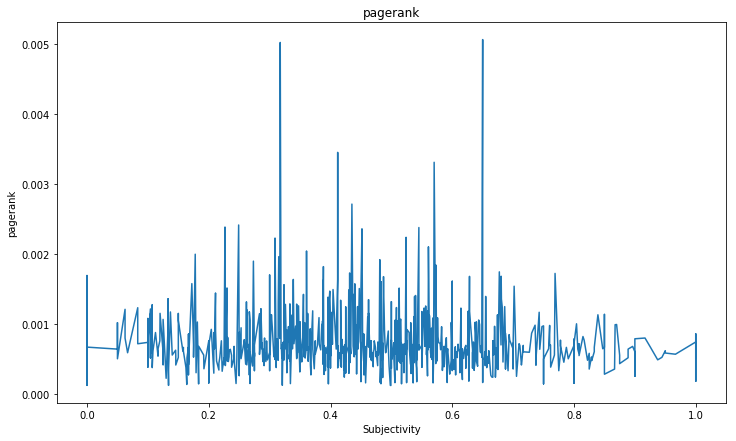

w_pagerank


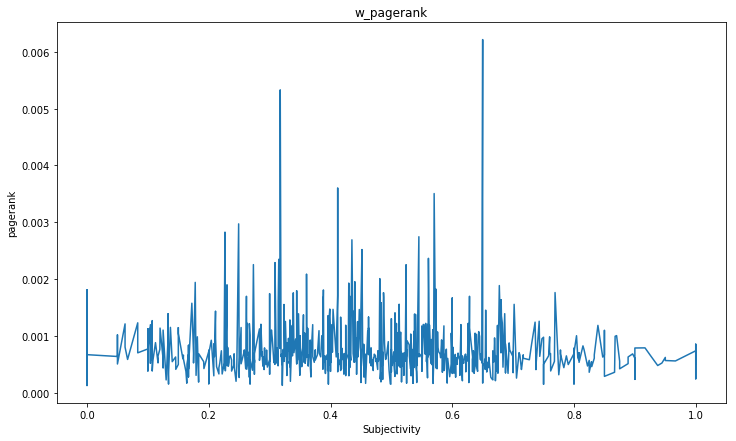

jac_pagerank


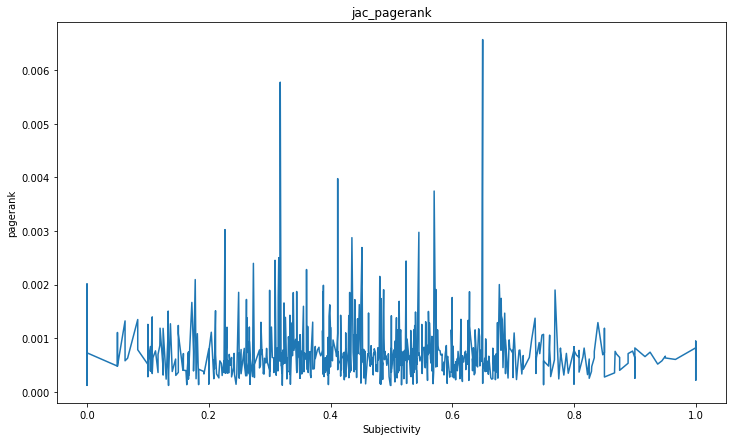

bgr_pagerank


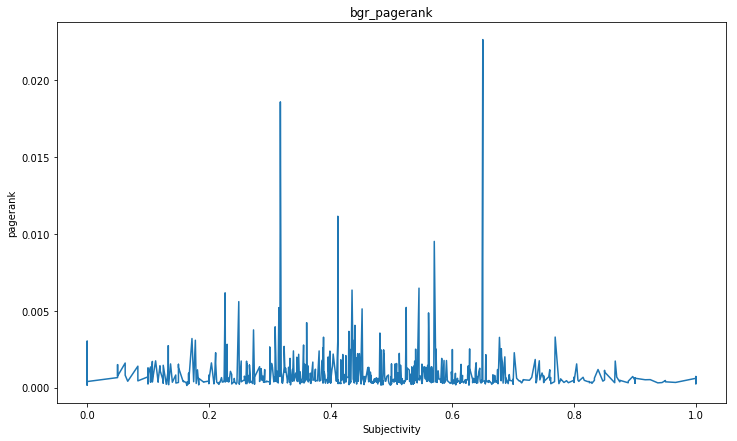

In [8]:
for metric in ["degree", "betweenness", "closeness", "eigenvector", "clustering coeff", "pagerank"]:
    for mode in ["", "w_", "jac_", "bgr_"]:
        try:
            plot_subjectivity(nxg, mode+metric)
        except KeyError:
            continue